In [17]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Connect to SQLite database
conn = sqlite3.connect("loans.db")

# Load encoded dataset table
df = pd.read_sql_query("SELECT * FROM loans", conn)

print("Shape:", df.shape)
df.head()

Shape: (148669, 48)


,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,Region_central,Region_south,loan_to_income,high_LTV_flag,very_high_LTV_flag,low_credit_flag,very_low_credit_flag,high_dti_flag,high_interest_flag,risk_interaction
0,0,0,1,0,0,11.665655,3.99,0.3904,2596.45,360.0,...,False,True,1.563297,1,0,0,0,0,0,0
1,0,0,1,0,1,12.238061,3.99,0.3904,2596.45,360.0,...,False,False,1.437508,0,0,1,1,0,0,0
2,0,1,1,0,0,12.915342,4.56,0.2000,595.00,360.0,...,False,True,1.410427,0,0,0,0,1,0,0
3,0,0,1,0,0,13.031346,4.25,0.6810,2596.45,360.0,...,False,False,1.38887,0,0,1,1,0,0,0
4,0,1,1,0,0,13.453825,4.00,0.3042,0.00,360.0,...,False,False,1.453918,1,0,1,0,0,0,1


In [18]:
print("Default Rate:", round(df['Status'].mean()*100,2), "%")

Default Rate: 24.64 %


In [19]:
df.groupby('high_LTV_flag')['Status'].mean()
df.groupby('low_credit_flag')['Status'].mean()
df.groupby('high_dti_flag')['Status'].mean()

high_dti_flag
0    0.245017
1    0.252487
Name: Status, dtype: float64

In [20]:
# Convert 'True'/'False' strings to 1/0
for col in df.columns:
    if df[col].dtype == 'object':
        if set(df[col].unique()) <= {'True', 'False'}:
            df[col] = df[col].map({'True':1, 'False':0})

In [21]:
df.corr()['Status'].sort_values(ascending=False)

Status                               1.000000
very_high_LTV_flag                   0.301116
lump_sum_payment                     0.187752
Neg_ammortization                    0.155834
co_applicant_credit_type_EXP         0.144236
high_LTV_flag                        0.135475
submission_of_application_to_inst    0.122413
loan_to_income                       0.100104
LTV                                  0.094329
loan_type_type2                      0.092548
business_or_commercial               0.092548
dtir1                                0.082425
risk_interaction                     0.073277
Gender_Sex_Not_Available             0.053343
loan_limit                           0.053331
age                                  0.044279
Region_south                         0.040056
loan_purpose_p2                      0.029369
total_units_2U                       0.022977
Gender_Male                          0.022651
Region_central                       0.016737
total_units_3U                    

In [22]:
df.select_dtypes(include='object').columns

Index(['loan_to_income'], dtype='object')

In [23]:
df['loan_to_income'] = pd.to_numeric(df['loan_to_income'], errors='coerce')

In [24]:
df.dtypes

loan_limit                             int64
approv_in_adv                          int64
Credit_Worthiness                      int64
open_credit                            int64
business_or_commercial                 int64
loan_amount                          float64
rate_of_interest                     float64
Interest_rate_spread                 float64
Upfront_charges                      float64
term                                 float64
Neg_ammortization                      int64
interest_only                          int64
lump_sum_payment                       int64
property_value                       float64
income                               float64
Credit_Score                           int64
age                                  float64
LTV                                  float64
Status                                 int64
dtir1                                float64
Gender_Joint                           int64
Gender_Male                            int64
Gender_Sex

In [25]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [26]:
df.corr()['Status'].sort_values(ascending=False)

Status                               1.000000
very_high_LTV_flag                   0.301116
lump_sum_payment                     0.187752
Neg_ammortization                    0.155834
co_applicant_credit_type_EXP         0.144236
high_LTV_flag                        0.135475
submission_of_application_to_inst    0.122413
loan_to_income                       0.100104
LTV                                  0.094329
loan_type_type2                      0.092548
business_or_commercial               0.092548
dtir1                                0.082425
risk_interaction                     0.073277
Gender_Sex_Not_Available             0.053343
loan_limit                           0.053331
age                                  0.044279
Region_south                         0.040056
loan_purpose_p2                      0.029369
total_units_2U                       0.022977
Gender_Male                          0.022651
Region_central                       0.016737
total_units_3U                    

In [27]:
# Replace infinite values
df['loan_to_income'] = df['loan_to_income'].replace([np.inf, -np.inf], np.nan)

# Drop NaNs for binning only
temp = df.dropna(subset=['loan_to_income'])

temp.groupby(pd.qcut(temp['loan_to_income'], 4, duplicates='drop'))['Status'].mean()

C:\Users\tejit\AppData\Local\Temp\ipykernel_61020\1262747753.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby(pd.qcut(temp['loan_to_income'], 4, duplicates='drop'))['Status'].mean()


loan_to_income
(0.957, 1.408]    0.216745
(1.408, 1.458]    0.215437
(1.458, 1.506]    0.222035
(1.506, 3.462]    0.306065
Name: Status, dtype: float64

In [28]:
df.duplicated().sum()

np.int64(0)

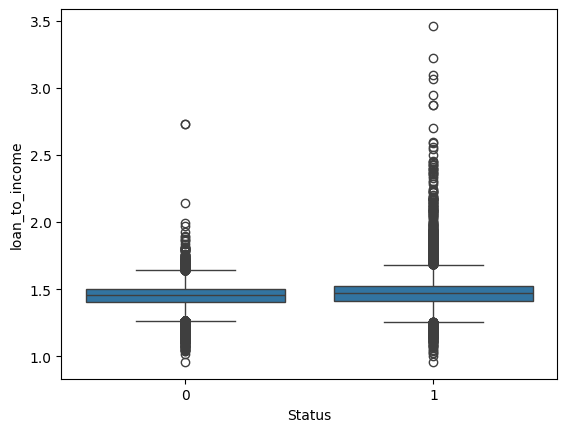

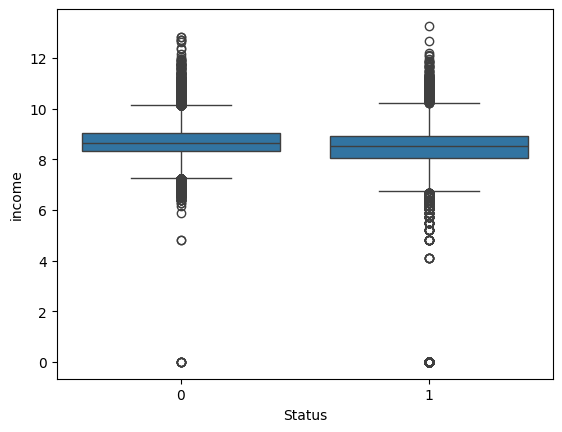

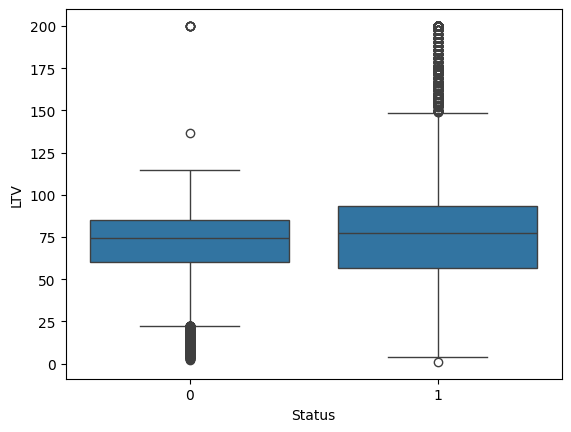

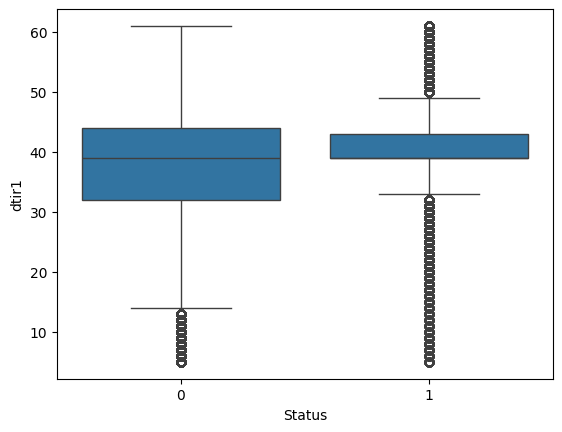

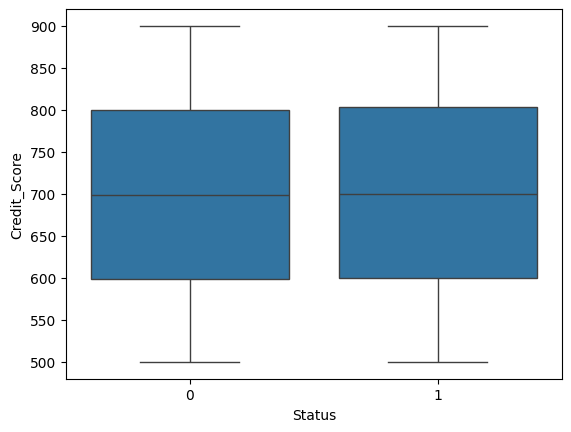

In [29]:
top = ['loan_to_income','income','LTV','dtir1','Credit_Score']

for col in top:
    sns.boxplot(x='Status', y=col, data=df)
    plt.show()